<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  1 Aban
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Info
student_number = 99102123

Name = Hossein

Last_Name = Goli

# Rules
- This assignment is due Aban 1th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Aban 11th 23:59:59.

## Libraries

In [1]:
! pip install numpy
! pip install pandas
! pip install tqdm
! pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import pickle as pkl
from tqdm import tqdm
from matplotlib import pyplot as plt
from simulated_annealing import SimulatedAnnealing

# Simulated Annealing (100 Points)

<font size=4>
Authors: Arshan Dalili
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In This Problem, We want to investigate the subset sum problem. Informally, find a subset from a given set of numbers that their sum is equal to a given number. For example, if the given set is $ {1, 2, 3, 4, 5}$  and the given number is $ 10 $, then the subset $ {1, 2, 3, 4} $ is a solution. One important assumption that we make is that the given set is a set of positive integers. In this problem, we want to find a solution for the subset sum problem using Simulated Annealing.


The Formal definition of the problem is as follows:
Given a set of positive integers $ S $ and a positive integer $ k $, find a subset $ S' $ of $ S $ such that $ \sum_{i \in S'} i = k $.

We call an answer feasible if it is a subset of $ S $ and its sum is **less than or equal** to $ k $. (i.e. $ \sum_{i \in S'} i \leq k $)

This variant of Subset Sum is a famous NP-Complete optimization problem. It means that we currently don't have any polynomial-time algorithm for this problem. Therefore it is reasonable to use optimization algorithms like local search to find an approximate but not necessarily perfect answer.

Answer to this problem is a vector $ \overrightarrow{x} $ of $ 0 $ and $ 1 $ of length $ |S| $, where $ 1 $ means that the corresponding element of $ S $ is in the subset and $ 0 $ means that it is not. For example, if $ S = \{1, 2, 3, 4, 5\} $ and $ k = 10 $, then one of the feasible answers is $ [1, 1, 1, 1, 0] $. (i.e. $ \overrightarrow{x}.\overrightarrow{S} \leq 10 $)

**Complete the _SimulatedAnnealing.py_ file and then run the following cells to test your implementation.**

## Reading input data

We provide data in the form of pickle (.pkl) file. The input is a list of two dictionaries. Each dictionary represents a set ($ S $) and a target value ($ T $). By running the below code, you can read the data and see the sets and the target values. (You can access to $ i $ th set by $ inputs[i]['S'] $ and $ i $ th target value by $ inputs[i]['T'] $)

In [3]:
"""
No need to change this cell.
"""

def read_inputs(path='inputs.pkl'):
    inputs = None
    with open(path, 'rb') as fp:
        inputs = pkl.load(fp)
    return inputs

inputs = read_inputs()

Use the function below to visualize the progress of your algorithm. It will plot the cost of the best solution found so far in each iteration. You can use it to see how your algorithm is progressing.

In [4]:
"""
No need to change this cell.
"""

def plot(records):
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Vs. Iterations")
    plt.plot(records['iteration'], records['best_cost'])
    plt.show()

Run the cell below to run the algorithm on the test cases. (Feel free to change the parameters of the algorithm)

100%|██████████| 6000/6000 [00:00<00:00, 14458.65it/s]


Best Value Found: 139532 - Target Value: 139533


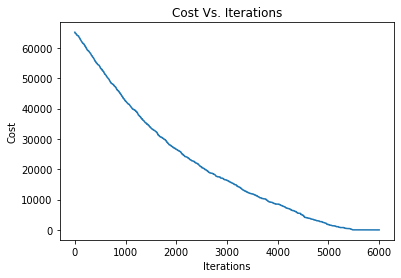

100%|██████████| 10000/10000 [00:00<00:00, 11683.23it/s]


Best Value Found: 232703 - Target Value: 238208


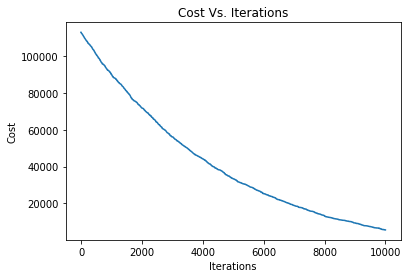

100%|██████████| 20000/20000 [00:03<00:00, 6490.18it/s]


Best Value Found: 452844 - Target Value: 452844


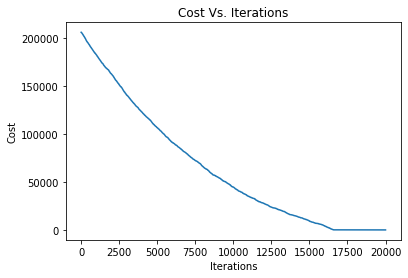

In [5]:
simulated_annealing = SimulatedAnnealing()
for test in inputs:
    best_cost, best_solution, records = simulated_annealing.run_algorithm(test['S'], test['T'], stopping_iter=2*len(test['S']))
    print(f"Best Value Found: {np.dot(best_solution, test['S'])} - Target Value: {test['T']}")
    plot(records)